## First What is BERT?

BERT stands for Bidirectional Encoder Representations from Transformers. The name itself gives us several clues to what BERT is all about.

BERT architecture consists of several Transformer encoders stacked together. Each Transformer encoder encapsulates two sub-layers: a self-attention layer and a feed-forward layer.

### There are two different BERT models:

- BERT base, which is a BERT model consists of 12 layers of Transformer encoder, 12 attention heads, 768 hidden size, and 110M parameters.

- BERT large, which is a BERT model consists of 24 layers of Transformer encoder,16 attention heads, 1024 hidden size, and 340 parameters.



BERT Input and Output
BERT model expects a sequence of tokens (words) as an input. In each sequence of tokens, there are two special tokens that BERT would expect as an input:

- [CLS]: This is the first token of every sequence, which stands for classification token.
- [SEP]: This is the token that makes BERT know which token belongs to which sequence. This special token is mainly important for a next sentence prediction task or question-answering task. If we only have one sequence, then this token will be appended to the end of the sequence.


It is also important to note that the maximum size of tokens that can be fed into BERT model is 512. If the tokens in a sequence are less than 512, we can use padding to fill the unused token slots with [PAD] token. If the tokens in a sequence are longer than 512, then we need to do a truncation.

And that’s all that BERT expects as input.

BERT model then will output an embedding vector of size 768 in each of the tokens. We can use these vectors as an input for different kinds of NLP applications, whether it is text classification, next sentence prediction, Named-Entity-Recognition (NER), or question-answering.


------------

**For a text classification task**, we focus our attention on the embedding vector output from the special [CLS] token. This means that we’re going to use the embedding vector of size 768 from [CLS] token as an input for our classifier, which then will output a vector of size the number of classes in our classification task.

-----------------------

![Imgur](https://imgur.com/NpeB9vb.png)


# The concept of adding a custom task-specific layer to a HF Model

![](https://github.com/Gdisbar/Notes/blob/main/LLM/1.png?raw=1)


When we switch from the pretraining task to the downstream task, we
need to replace the last layer of the model with one that is suitable for the task.
This last layer is called the model head; it’s the part that is task-specific.

The rest of the model is called the body; it includes the token embeddings and
transformer layers that are task-agnostic.

This structure is reflected in the Transformers code as well: the body of a model is implemented in a class such
as BertModel or GPT2Model that returns the hidden states of the last layer.

### To get it we do `outputs[0]=last hidden state`

The hidden states are passed as inputs to a model head to produce the final output. 🤗 Transformers provides a different model head for each task as long as a model supports the task (i.e., you can’t use DistilBERT for a sequence-to-sequence task like translation).

And then we have Task-specific models such as BertForMaskedLM or BertForSequenceClassification - which usees the base model and add the necessary head on top of the hidden states,

For example, **`DistilBertForSequenceClassification`** is a base DistilBERT model with a sequence classification head. The sequence classification head is a linear layer on top of the **pooled** outputs.

For a **question answering task**, you would use the **`DistilBertForQuestionAnswering`** model head. The question answering head is similar to the sequence classification head except it is a linear layer on top of the **hidden states** output.


-------------------------------------------------------------
Encoder-Only Models:
-----------------------------------------------------
Text Classification: BERT (Google), RoBERTa (Facebook), DeBERTa (Microsoft)
Sentiment Analysis: BERT (Google), RoBERTa (Facebook), XLNet (Google/CMU)
Named Entity Recognition (NER): BERT (Google), SpaCy (Explosion AI), Flair (Fraunhofer IAIS)
Document Classification: BERT (Google), RoBERTa (Facebook), DeBERTa (Microsoft)

-------------------------------------------------------------
Decoder-Only Models:
----------------------------------------------------------
Text Generation: GPT-3 (OpenAI), Jurassic-1 Jumbo (AI21 Labs), WuDao 2.0 (BAAI)
Image Captioning: GPT-3 (OpenAI), DALL-E 2 (OpenAI), Stable Diffusion (Stability AI)

------------------------------------------------------------
Transformer Models:
------------------------------------------------------------
Language Modeling: GPT-3 (OpenAI), PaLM (Google), Jurassic-1 Jumbo (AI21 Labs)
Machine Translation: GNMT (Google), MarianMT (NVIDIA), T5 (Google)
Question Answering: GPT-3 (OpenAI), PaLM (Google), BlenderBot 3 (Google AI), Megatron-Turing NLG (NVIDIA)
Summarization: PEGASUS (Google), ProphetNet (Microsoft), T5 (Google)
Speech Recognition: Wav2Vec 2.0 (Facebook), Conformer (Google), Transformer Transducer (Nvidia)

-------------------------------------------------------------
Multilingual Models:
-------------------------------------------------------------
Machine Translation: M2M-100 (Facebook), mBART (Facebook), mT5 (Google)
Named Entity Recognition (NER): mBERT (Google), XLM-RoBERTa (Facebook), Flair (Fraunhofer IAIS)
Sentiment Analysis: mBERT (Google), XLM-RoBERTa (Facebook), Flair (Fraunhofer IAIS)
Language Modeling: mBERT (Google), XLM-RoBERTa (Facebook), XLM (Facebook AI)
Text Classification: mBERT (Google), XLM-RoBERTa (Facebook), XLM (Facebook AI)
Text Generation: mT5 (Google), mBART (Facebook)

-------------------------------------------------------------
Unified Models:
-------------------------------------------------------------
Natural Language Understanding (NLU) and Natural Language Generation (NLG): GPT-3 (OpenAI), PaLM (Google), Jurassic-1 Jumbo (AI21 Labs)
Question Answering: GPT-3 (OpenAI), PaLM (Google), BlenderBot 3 (Google AI), T5 (Google)
Dialogue Systems: GPT-3 (OpenAI), BlenderBot 3 (Google AI), Meena (Google)
Language Translation: GPT-3 (OpenAI), M2M-100 (Facebook), mT5 (Google)
Text Summarization: GPT-3 (OpenAI), PEGASUS (Google), ProphetNet (Microsoft), T5 (Google)
Sentiment Analysis: GPT-3 (OpenAI), BERT (Google), RoBERTa (Facebook), Flair (Fraunhofer IAIS)





### To get it we do `outputs[0]=last hidden state`

In [ ]:
# Mount your Google Drive.
from google.colab import files
files.upload()

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection


news-headlines-dataset-for-sarcasm-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/news-headlines-dataset-for-sarcasm-detection.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
!pip install -q transformers[torch] datasets
# !pip install -q accelerate -U

In [ ]:
import numpy as np
import pandas as pd

from datasets import load_dataset,Dataset,DatasetDict
from transformers import DataCollatorWithPadding,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd
import os


Note: You can use any model in this example (not necessarily a model trained for classification) since we will only use that model’s body and leave the head.

In [ ]:
dataset_v2_path = "/content/Sarcasm_Headlines_Dataset_v2.json"

In [ ]:
df = pd.read_json(dataset_v2_path, lines=True)
df = df.rename(columns={'is_sarcastic':'label'})
df.drop(['article_link'],axis=1,inplace=True)
df = df.reset_index()[['label','headline']]
print(df.shape,type(df))
df.head()

(28619, 2) <class 'pandas.core.frame.DataFrame'>


,label,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


## Training New Tokenizer

Here we're creating new tokenizer using custom dataset

The good thing about training tokenizers using Hugging Face Tokenizers library is that we can use existing tokenizers and replace only vocabulary (and merge where applicable) per our training corpus. This means tokenization steps such as pre-tokenization and post-tokenization will be preserved. For this, we can use a method, train_new_from_iterator BertTokenizer class.

In [ ]:
from tokenizers.implementations import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing
from transformers import AutoTokenizer
from datasets import Dataset



#load base tokenizer to train on dataset
tokenizer_base = AutoTokenizer.from_pretrained("bert-base-uncased")
# convert pandas dataset to HF dataset
dataset = Dataset.from_pandas(df)


def batch_iterator(dataset):
    num_samples = len(dataset)
    start_index = 0

    while start_index < num_samples:
        end_index = min(start_index + 1, num_samples)
        batch = dataset[start_index:end_index]['headline']
        start_index = end_index
        yield batch



# ensure sufficient space for special tokens, such as [UNK], [SEP], [CLS], and others.
vocab_size = len(df)*2
# batch_size = 32
max_token_length = 512
tokenizer = tokenizer_base.train_new_from_iterator(batch_iterator(dataset),
                                                   vocab_size=vocab_size,
                                                   truncation=True, max_length=max_token_length)
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
tokenizer.save_pretrained("tokenizers_new")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

('tokenizers_new/tokenizer_config.json',
 'tokenizers_new/special_tokens_map.json',
 'tokenizers_new/vocab.txt',
 'tokenizers_new/added_tokens.json',
 'tokenizers_new/tokenizer.json')

In [ ]:
#test trained tokenizer for sample text
text = dataset['headline'][123]
print(text)
input_ids = tokenizer(text).input_ids
subword_view = [tokenizer.convert_ids_to_tokens(id) for id in input_ids]
print(f"sub-word view : {np.array(subword_view)}")
print(f"Encoded tokens : {tokenizer.encode(text)}")
print(f"Decoded tokens : {tokenizer.decode(input_ids)}")
print(f"new tokenized view : {tokenizer.tokenize(text)}")
old_tokens = tokenizer_base.tokenize(text)
print(f"old tokenized view : {old_tokens}")

rnc leader to trump: tone it down!
sub-word view : ['[CLS]' 'rnc' 'leader' 'to' 'trump' ':' 'tone' 'it' 'down' '!' '[SEP]']
Encoded tokens : [2, 3837, 2270, 139, 223, 30, 10236, 260, 541, 5, 3]
Decoded tokens : [CLS] rnc leader to trump : tone it down! [SEP]
new tokenized view : ['rnc', 'leader', 'to', 'trump', ':', 'tone', 'it', 'down', '!']
old tokenized view : ['rn', '##c', 'leader', 'to', 'trump', ':', 'tone', 'it', 'down', '!']


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from tokenizers import Tokenizer
import torch
from torch.nn.utils.rnn import pad_sequence

# Load the trained tokenizer
tokenizer = Tokenizer.from_file("tokenizers_new/tokenizer.json")

# Sample headlines
headlines = [
    "US President visits France for bilateral talks",
    "France celebrates its national day with grand parade",
    "Study finds link between diet and heart disease",
    "New research suggests potential treatment for Alzheimer's",
    "Stock markets experience significant drop amid economic concerns",
    "Global leaders gather for climate change summit"
]

# Tokenize headlines
tokenized_headlines = [tokenizer.encode(headline).ids for headline in headlines]

# Pad sequences to ensure equal length
max_len = max(len(seq) for seq in tokenized_headlines)
padded_tokenized_headlines = pad_sequence([torch.tensor(seq) for seq in tokenized_headlines], batch_first=True, padding_value=0)

# Convert to numpy array
padded_tokenized_headlines = padded_tokenized_headlines.numpy()

# Apply KMeans clustering
n_clusters = 2  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(padded_tokenized_headlines)

# Assign cluster labels to headlines
cluster_labels = kmeans.labels_

# Print clusters
for i in range(n_clusters):
    cluster_headlines = np.array(headlines)[cluster_labels == i]
    print(f"Cluster {i+1}:")
    for headline in cluster_headlines:
        print(headline)
    print()

# Calculate similarity between sentences
def calculate_similarity(sentence1, sentence2):
    tokenized_sentence1 = tokenizer.encode(sentence1).ids
    tokenized_sentence2 = tokenizer.encode(sentence2).ids

    # Pad sequences to ensure equal length
    max_len = max(len(tokenized_sentence1), len(tokenized_sentence2))
    tokenized_sentence1 += [0] * (max_len - len(tokenized_sentence1))
    tokenized_sentence2 += [0] * (max_len - len(tokenized_sentence2))

    similarity = cosine_similarity([tokenized_sentence1], [tokenized_sentence2])[0][0]
    return similarity

# Example of calculating similarity
sentence1 = "US President visits France for bilateral talks"
sentence2 = "France celebrates its national day with grand parade"
similarity = calculate_similarity(sentence1, sentence2)
print(f"Similarity between '{sentence1}' and '{sentence2}': {similarity}")
print()


Cluster 1:
France celebrates its national day with grand parade
Study finds link between diet and heart disease
New research suggests potential treatment for Alzheimer's
Stock markets experience significant drop amid economic concerns
Global leaders gather for climate change summit

Cluster 2:
US President visits France for bilateral talks

Similarity between 'US President visits France for bilateral talks' and 'France celebrates its national day with grand parade': 0.21125570344476347



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


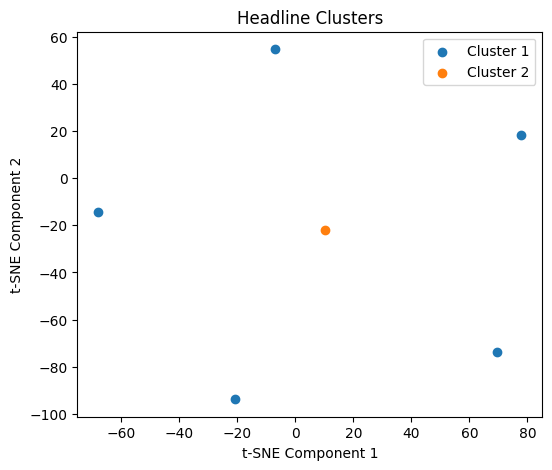

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)  # Setting perplexity to a lower value
X_embedded = tsne.fit_transform(padded_tokenized_headlines)

# Plot clusters
plt.figure(figsize=(6,5))
for i in range(n_clusters):
    cluster_headlines = X_embedded[cluster_labels == i]
    plt.scatter(cluster_headlines[:, 0], cluster_headlines[:, 1], label=f'Cluster {i+1}')

plt.title('Headline Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()


## Orginal Article : https://towardsdatascience.com/adding-custom-layers-on-top-of-a-hugging-face-model-f1ccdfc257bd

## Vector size "bert-base-uncased"

In the model each token is embedded into a vector of size 768. The shape of the output from the base model is

### (batch_size, max_sequence_length, embedding_vector_size=768)

In [ ]:
dataset_hf=load_dataset("json", data_files=dataset_v2_path)

dataset_hf=dataset_hf.remove_columns(['article_link'])

dataset_hf.set_format('pandas')

dataset_hf=dataset_hf['train'][:]

dataset_hf.drop_duplicates(subset=['headline'],inplace=True)

dataset_hf=dataset_hf.reset_index().rename(columns={"is_sarcastic":"label"})[['headline','label']]

dataset_hf=Dataset.from_pandas(dataset_hf)


# Train Test Valid Split
train_testvalid = dataset_hf.train_test_split(test_size=0.2,seed=15)


test_valid = train_testvalid['test'].train_test_split(test_size=0.5,seed=15)

dataset_hf = DatasetDict({
    'train': train_testvalid['train'],
    'test': test_valid['test'],
    'valid': test_valid['train']})

dataset_hf

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['headline', 'label'],
        num_rows: 22802
    })
    test: Dataset({
        features: ['headline', 'label'],
        num_rows: 2851
    })
    valid: Dataset({
        features: ['headline', 'label'],
        num_rows: 2850
    })
})

In [ ]:
from datasets import DatasetDict

# # Load the saved tokenizer
# tokenizer = AutoTokenizer.from_pretrained("tokenizers_new")

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
tokenizer.model_max_len=512


def tokenize(batch):
  return tokenizer(batch["headline"], truncation=True, padding=True)


tokenized_dataset = dataset_hf.map(tokenize, batched=True,batch_size=None)
tokenized_dataset

Map:   0%|          | 0/22802 [00:00<?, ? examples/s]

Map:   0%|          | 0/2851 [00:00<?, ? examples/s]

Map:   0%|          | 0/2850 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['headline', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 22802
    })
    test: Dataset({
        features: ['headline', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2851
    })
    valid: Dataset({
        features: ['headline', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2850
    })
})

In [ ]:
tokenized_dataset.set_format('torch', columns=["input_ids", "attention_mask", "label"] )

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
print('Feature Names of Dataset ', tokenized_dataset['train'].column_names)
print(tokenizer.model_input_names)

Feature Names of Dataset  ['headline', 'label', 'input_ids', 'token_type_ids', 'attention_mask']
['input_ids', 'token_type_ids', 'attention_mask']


Map:   0%|          | 0/22802 [00:00<?, ? examples/s]

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# Load the dataset
dataset = load_dataset("json", data_files=dataset_v2_path)
dataset=dataset.remove_columns(['article_link'])
dataset.set_format('pandas')
dataset=dataset['train'][:]
dataset.drop_duplicates(subset=['headline'],inplace=True)
dataset=dataset.reset_index().rename(columns={"is_sarcastic":"label"})[['headline','label']]
dataset=Dataset.from_pandas(dataset)

# Initialize the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained("distilbert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize(batch):
    return tokenizer(batch['headline'], padding=True, truncation=True)

pretrained_dataset = dataset.map(tokenize, batched=True, batch_size=None)

# Function to get hidden states
def get_hidden_state(batch):
    inputs = {
        k: torch.tensor(v, dtype=torch.long).unsqueeze(0).to(device)
        for k, v in batch.items()
        if k in ['input_ids', 'attention_mask']
    }
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    return {'hidden_state': last_hidden_state[:, 0].cpu().numpy()}

# Collect hidden states
pretrained_hidden_states = pretrained_dataset.map(get_hidden_state, batched=True)


# Collect hidden states
pretrained_hidden_states = pretrained_dataset.map(get_hidden_state, batched=True)

# Get numpy arrays from hidden states
X_train = np.array(pretrained_hidden_states["train"]["hidden_state"])
X_valid = np.array(pretrained_hidden_states['valid']["hidden_state"])  # Corrected from 'validation' to 'valid'

y_train = np.array(tokenized_dataset["train"]["label"])
y_valid = np.array(tokenized_dataset["valid"]["label"])

# Scale features to [0,1] range
X_train_scaled = MinMaxScaler().fit_transform(X_train)

from umap import UMAP
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_train_scaled)

# Create a DataFrame of 2D embeddings
df_embedded_from_hidden = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_embedded_from_hidden["label"] = y_train

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Color maps for plotting
cmaps = ['Greys', 'Blues']

# Labels for the dataset
labels = ['0', '1']  # Replace with actual labels

# Plot each label separately
for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_embedding_subplot = df_embedded_from_hidden.query(f"label == {i}")
    axes[i].hexbin(df_embedding_subplot["X"], df_embedding_subplot["Y"], cmap=cmap, gridsize=20, linewidths=(0,))
    axes[i].set_title(label, color='white')
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()


Map:   0%|          | 0/28503 [00:00<?, ? examples/s]

Map:   0%|          | 0/28503 [00:00<?, ? examples/s]

AttributeError: 'list' object has no attribute 'to'

https://huggingface.co/docs/transformers/main_classes/data_collator


Data collators are objects that will form a batch by using a list of dataset elements as input. These elements are of the same type as the elements of train_dataset or eval_dataset.

To be able to build batches, data collators may apply some processing (like padding). Some of them (like DataCollatorForLanguageModeling) also apply some random data augmentation (like random masking) on the formed batch.

data_collator automatically pads the model inputs in a batch to the length of the longest example. This bypasses the need to set a global maximum sequence length, and in practice leads to faster training since we perform fewer redundant computations on the padded tokens and attention masks.


------------

## We construct `MyTaskSpecificCustomModel` class that inherits from the nn.Module.

In [ ]:
class MyTaskSpecificCustomModel(nn.Module):
    """
    A task-specific custom transformer model. This model loads a pre-trained transformer model and adds a new dropout
    and linear layer at the end for fine-tuning and prediction on specific tasks.
    """
    def __init__(self, checkpoint, num_labels ):
        """
        Args:
            checkpoint (str): The name of the pre-trained model or path to the model weights.
            num_labels (int): The number of output labels in the final classification layer.
        """
        super(MyTaskSpecificCustomModel, self).__init__()
        self.num_labels = num_labels

        self.model = model = AutoModel.from_pretrained(checkpoint,
                                      config = AutoConfig.from_pretrained(checkpoint,
                                      output_attention = True,output_hidden_state = True ) )
        # New Layer
        print(self.model)
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(768, num_labels )

    def forward(self, input_ids = None, attention_mask=None, labels = None ):
        """
        Forward pass for the model.

        Args:
            input_ids (torch.Tensor, optional): Tensor of input IDs. Defaults to None.
            attention_mask (torch.Tensor, optional): Tensor for attention masks. Defaults to None.
            labels (torch.Tensor, optional): Tensor for labels. Defaults to None.

        Returns:
            TokenClassifierOutput: A named tuple with the following fields:
            - loss (torch.FloatTensor of shape (1,), optional, returned when label_ids is provided) – Classification loss.
            - logits (torch.FloatTensor of shape (batch_size, num_labels)) – Classification scores before SoftMax.
            - hidden_states (tuple(torch.FloatTensor), optional, returned when output_hidden_states=True is passed or when config.output_hidden_states=True) – Tuple of torch.FloatTensor (one for the output of the embeddings + one for the output of each layer) of shape (batch_size, sequence_length, hidden_size).
            - attentions (tuple(torch.FloatTensor), optional, returned when output_attentions=True is passed or when config.output_attentions=True) – Tuple of torch.FloatTensor (one for each layer) of shape (batch_size, num_heads, sequence_length, sequence_length).
        """
        outputs = self.model(input_ids = input_ids, attention_mask = attention_mask  )
        print(type(outputs))

        last_hidden_state = outputs[0]
        print("Hidden state : ",last_hidden_state.size())
        sequence_outputs = self.dropout(last_hidden_state)
        print("Sequence output : ",sequence_outputs.size())
        logits = self.classifier(sequence_outputs[:, 0, : ].view(-1, 768 ))
        print("Logits : ",logits.size())
        loss = None
        loss = None
        if labels is not None:
            loss_func = nn.CrossEntropyLoss()
            loss = loss_func(logits.view(-1, self.num_labels), labels.view(-1))

            return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states, attentions=outputs.attentions)



## attention_mask

From Doc - This argument indicates to the model which tokens should be attended to, and which should not.

### If the attention_mask is 0, the token id is ignored. For instance if a sequence is padded to adjust the sequence length, the padded words should be ignored hence their attention_mask are 0.

--------------

### torch.nn.Linear(in_features, out_features, bias=True)

Parameters
in_features – size of each input sample
out_features – size of each output sample

## Making sense of `nn.Linear`

#### In your Neural Network, the `self.hidden = nn.Linear(784, 256)` defines a _hidden_ (meaning that it is in between of the input and output layers), _fully connected linear layer_, which takes input `x` of shape `(batch_size, 784)`, where batch size is the number of inputs (each of size 784) which are passed to the network at once (as a single tensor), and transforms it by the linear equation `y = x*W^T + b` into a tensor `y` of shape `(batch_size, 256)`.

------------------------

# Create PyTorch DataLoader

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    tokenized_dataset['train'], shuffle = True, batch_size = 32, collate_fn = data_collator
)

eval_dataloader = DataLoader(
    tokenized_dataset['valid'], shuffle = True, collate_fn = data_collator
)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_task_specific = MyTaskSpecificCustomModel(checkpoint="bert-base-uncased", num_labels=2 ).to(device)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [ ]:
from transformers import get_linear_schedule_with_warmup

optimizer = torch.optim.AdamW(model_task_specific.parameters(), lr = 5e-5 )

num_epoch = 3

num_training_steps = num_epoch * len(train_dataloader)

lr_scheduler = get_linear_schedule_with_warmup(
    optimizer = optimizer,
    num_warmup_steps = 0,
    num_training_steps = num_training_steps,

)

In [ ]:
from torch.utils.data import DataLoader


it = 0
for epoch in range(1):
    model_task_specific.train()
    for batch in train_dataloader:
      it+=1
      batch = { k: v.to(device) for k, v in batch.items() }
      outputs = model_task_specific(**batch)
      loss = outputs.loss
      loss.backward()

      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()

      if it==3: break

<class 'transformers.modeling_outputs.BaseModelOutputWithPoolingAndCrossAttentions'>
Hidden state :  torch.Size([32, 27, 768])
Sequence output :  torch.Size([32, 27, 768])
Logits :  torch.Size([32, 2])
<class 'transformers.modeling_outputs.BaseModelOutputWithPoolingAndCrossAttentions'>
Hidden state :  torch.Size([32, 23, 768])
Sequence output :  torch.Size([32, 23, 768])
Logits :  torch.Size([32, 2])
<class 'transformers.modeling_outputs.BaseModelOutputWithPoolingAndCrossAttentions'>
Hidden state :  torch.Size([32, 25, 768])
Sequence output :  torch.Size([32, 25, 768])
Logits :  torch.Size([32, 2])


In [ ]:
from datasets import load_metric
metric = load_metric("f1")

<ipython-input-19-e4b2221a8929>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("f1")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


# Training

In [ ]:
from tqdm.auto import tqdm

progress_bar_train = tqdm(range(num_training_steps))
progress_bar_eval = tqdm(range(num_epoch * len(eval_dataloader) ))


for epoch in range(num_epoch):
    model_task_specific.train()
    for batch in train_dataloader:
        batch = { k: v.to(device) for k, v in batch.items() }
        outputs = model_task_specific(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar_train.update(1)

    model_task_specific.eval()
    for batch in eval_dataloader:
        batch = { k: v.to(device) for k, v in batch.items() }
        with torch.no_grad():
            outputs = model_task_specific(**batch)

        logits = outputs.logits
        predictions = torch.argmax(logits, dim = -1 )
        metric.add_batch(predictions = predictions, references = batch['labels'] )
        progress_bar_eval.update(1)

    print(metric.compute())



  0%|          | 0/2139 [00:00<?, ?it/s]

  0%|          | 0/8550 [00:00<?, ?it/s]

{'f1': 0.9324831207801951}
{'f1': 0.9273488018257894}
{'f1': 0.9279451010293556}


## Post Training Evaluation

In [ ]:
model_task_specific.eval()

test_dataloader = DataLoader(
    tokenized_dataset['test'], batch_size = 32, collate_fn = data_collator
)


for batch in test_dataloader:
    batch = { k: v.to(device) for k, v in batch.items() }
    with torch.no_grad():
        outputs = model_task_specific(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim = -1)
    metric.add_batch(predictions = predictions, references=batch['labels'] )

metric.compute()


{'f1': 0.9281974569932686}

In [ ]:
#